## This notebook illustrates how to read data, clean, and graph on a 3-axis figure
Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### Read data into a pandas dataframe

In [2]:
filename = 'eclog_LOS.txt'
df = pd.read_csv(filename, parse_dates = True, index_col = 0)
df

MS_pres  MS_temp      R_av    i_av  Therm_temp
datetime                                                           
2022-03-10 10:28:52    13.04  1028.09   656.614  0.0015      -59.80
2022-03-10 10:31:24    12.83  1028.15  1096.310  0.0007      -59.19
2022-03-10 10:34:00    11.84  1028.33  1124.043  0.0007      -60.51
2022-03-10 10:36:35    11.34  1028.63  1145.399  0.0007      -61.11
2022-03-10 10:39:11    11.22  1028.70  1394.244  0.0006      -60.97
...                      ...      ...       ...     ...         ...
2022-03-11 16:46:42     9.33  1014.15  4165.582  0.0002      -58.66
2022-03-11 16:49:18     9.55  1014.15  4024.327  0.0002      -58.35
2022-03-11 16:51:53     9.84  1014.96  3956.626  0.0002      -58.15
2022-03-11 16:54:29    10.06  1014.78  3955.596  0.0002      -57.71
2022-03-11 16:57:05    10.30  1014.57  3559.710  0.0002      -57.87

[679 rows x 5 columns]

### Clean the data
There are two simple things we can do to make the graphs look nice.  First, we can resample only the data within a given date range.  Change this range to suite your data. Then, we can also replace all values of -999 with not a number (nan) values so that they won't plot. If you have bad data on just a few rows, you can always also just delete rows from your textfile before importing.

In [11]:
df = df.loc['2022-3-10 10:30:00':'2022-3-10 11:45:00']
df = df.replace(-999,np.nan)
df

MS_pres  MS_temp      R_av    i_av  Therm_temp  \
datetime                                                              
2022-03-10 10:31:24    12.83  1028.15  1096.310  0.0007      -59.19   
2022-03-10 10:34:00    11.84  1028.33  1124.043  0.0007      -60.51   
2022-03-10 10:36:35    11.34  1028.63  1145.399  0.0007      -61.11   
2022-03-10 10:39:11    11.22  1028.70  1394.244  0.0006      -60.97   
2022-03-10 10:41:47    10.58  1028.71  1234.814  0.0006      -61.25   
2022-03-10 10:44:23    10.28  1028.84  1201.392  0.0006      -62.47   
2022-03-10 10:46:59     9.86  1028.92  1127.319  0.0006      -62.70   
2022-03-10 10:49:35     9.74  1028.55  1126.392  0.0006      -61.60   
2022-03-10 10:52:10     8.16  1181.02   494.468  0.0012      -66.09   
2022-03-10 10:54:46     7.32  1239.87   410.259  0.0012      -67.25   
2022-03-10 11:27:43      NaN      NaN   422.911  0.0011      -67.68   
2022-03-10 11:30:15      NaN      NaN   423.715  0.0011      -67.84   
2022-03-10 11:32:43      NaN      NaN   412.349  0.0011      -68.07   
2022-03-10 11:35:20      NaN      NaN   421.696  0.0011      -67.46   
2022-03-10 11:37:51      NaN      NaN   419.857  0.0011      -67.41   
2022-03-10 11:40:23     6.49  1219.28   372.372  0.0012      -68.24   
2022-03-10 11:42:59     6.49  1217.49   371.605  0.0012      -67.20   

                     newcolumn1  newcolumn2  
datetime                                     
2022-03-10 10:31:24     1027.15    0.000912  
2022-03-10 10:34:00     1027.33    0.000890  
2022-03-10 10:36:35     1027.63    0.000873  
2022-03-10 10:39:11     1027.70    0.000717  
2022-03-10 10:41:47     1027.71    0.000810  
2022-03-10 10:44:23     1027.84    0.000832  
2022-03-10 10:46:59     1027.92    0.000887  
2022-03-10 10:49:35     1027.55    0.000888  
2022-03-10 10:52:10     1180.02    0.002022  
2022-03-10 10:54:46     1238.87    0.002437  
2022-03-10 11:27:43         NaN    0.002365  
2022-03-10 11:30:15         NaN    0.002360  
2022-03-10 11:32:43         NaN    0.002425  
2022-03-10 11:35:20         NaN    0.002371  
2022-03-10 11:37:51         NaN    0.002382  
2022-03-10 11:40:23     1218.28    0.002685  
2022-03-10 11:42:59     1216.49    0.002691

### Do a computation on a column (you should use this step to compute depth).
The first line in the following snippets creates a column of blank values. The code will execute without that line, but gives a warning message.  The second line actually computes the values in the new column based on values in other columns.

In [15]:
df['newcolumn1'] = ''
df['newcolumn1'] = (df['MS_temp']-1)*1/1

In [17]:
df['newcolumn2'] = ''
df['newcolumn2'] = 1/df['R_av']
df

MS_pres  MS_temp      R_av    i_av  Therm_temp  \
datetime                                                              
2022-03-10 10:31:24    12.83  1028.15  1096.310  0.0007      -59.19   
2022-03-10 10:34:00    11.84  1028.33  1124.043  0.0007      -60.51   
2022-03-10 10:36:35    11.34  1028.63  1145.399  0.0007      -61.11   
2022-03-10 10:39:11    11.22  1028.70  1394.244  0.0006      -60.97   
2022-03-10 10:41:47    10.58  1028.71  1234.814  0.0006      -61.25   
2022-03-10 10:44:23    10.28  1028.84  1201.392  0.0006      -62.47   
2022-03-10 10:46:59     9.86  1028.92  1127.319  0.0006      -62.70   
2022-03-10 10:49:35     9.74  1028.55  1126.392  0.0006      -61.60   
2022-03-10 10:52:10     8.16  1181.02   494.468  0.0012      -66.09   
2022-03-10 10:54:46     7.32  1239.87   410.259  0.0012      -67.25   
2022-03-10 11:27:43      NaN      NaN   422.911  0.0011      -67.68   
2022-03-10 11:30:15      NaN      NaN   423.715  0.0011      -67.84   
2022-03-10 11:32:43      NaN      NaN   412.349  0.0011      -68.07   
2022-03-10 11:35:20      NaN      NaN   421.696  0.0011      -67.46   
2022-03-10 11:37:51      NaN      NaN   419.857  0.0011      -67.41   
2022-03-10 11:40:23     6.49  1219.28   372.372  0.0012      -68.24   
2022-03-10 11:42:59     6.49  1217.49   371.605  0.0012      -67.20   

                     newcolumn1  newcolumn2  
datetime                                     
2022-03-10 10:31:24     1027.15    0.000912  
2022-03-10 10:34:00     1027.33    0.000890  
2022-03-10 10:36:35     1027.63    0.000873  
2022-03-10 10:39:11     1027.70    0.000717  
2022-03-10 10:41:47     1027.71    0.000810  
2022-03-10 10:44:23     1027.84    0.000832  
2022-03-10 10:46:59     1027.92    0.000887  
2022-03-10 10:49:35     1027.55    0.000888  
2022-03-10 10:52:10     1180.02    0.002022  
2022-03-10 10:54:46     1238.87    0.002437  
2022-03-10 11:27:43         NaN    0.002365  
2022-03-10 11:30:15         NaN    0.002360  
2022-03-10 11:32:43         NaN    0.002425  
2022-03-10 11:35:20         NaN    0.002371  
2022-03-10 11:37:51         NaN    0.002382  
2022-03-10 11:40:23     1218.28    0.002685  
2022-03-10 11:42:59     1216.49    0.002691

### Create a blank 3-part graph
Here, we ensure that zooming on one allows zooming on the other using the sharex argument.

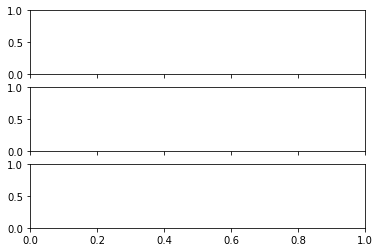

In [6]:
fig1,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)

### Add data to each graph
This data here is meaningless because it is from before our deployment, but you can change the date range in an earlier step to get a meaninful graph.

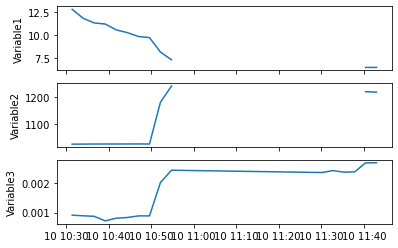

In [7]:
    ax1.plot(df['MS_pres'])
    #Note that pressure and temperature are mis-labeled in the data files
    ax1.set_ylabel("Variable1")
    ax2.plot(df['newcolumn1'])
    ax2.set_ylabel("Variable2")
    ax3.plot(df['newcolumn2'])
    ax3.set_ylabel("Variable3")
    #ax1.set_ylim(5,50)
    #ax2.set_ylim(0,3)
    fig1

### Format the date labels

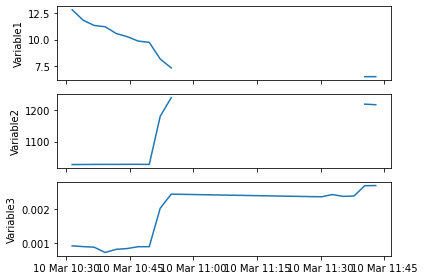

In [8]:
    locator = mdates.AutoDateLocator(minticks=5, maxticks=7)
    ax1.xaxis.set_major_locator(locator)
    ax2.xaxis.set_major_locator(locator)
    ax3.xaxis.set_major_locator(locator)
    myFmt = mdates.DateFormatter('%d %h %H:%M')
    ax1.xaxis.set_major_formatter(myFmt)   
    ax2.xaxis.set_major_formatter(myFmt)   
    ax3.xaxis.set_major_formatter(myFmt)   
    fig1.tight_layout()
    fig1